# Ejemplo del satélite artificial: Aplicación de métodos para problemas conservativos

<ul id="top">
<li><a href="#Problema-del-satélite-artificial">Problema del satélite artificial </a></li>
<li><a href="#1-Error-en-energía-de-RK4">1-Error en energía de RK4</a></li>
<li><a href="#2-Implementación-del-método-RKG4">2-Implementación del método RKG4</a></li>
<li><a href="#3-Errores-en-energía-del-método-RKG4">3-Errores en energía del método RKG4 </a></li>
<li><a href="#4-Comparación-de-errores-en-energía-de-RK4-y-RKG4-para-tiempos-largos">4-Comparación de errores en energía de RK4 y RKG4 para tiempos largos</a></li>
<li><a href="#Valoración">Valoración</a></li>
</ul>  

In [1]:
using Plots
using LinearAlgebra

## Problema del satélite artificial 

Consideraremos la evolución de un satélite artificial moviéndose bajo el influjo gravitacional de la tierra. 

 En el modelo matemático que consideramos a continuación, se tiene en cuenta el ligero achatamiento que presenta la tierra en los polos. (Sin embargo, no se tiene en cuenta otros efectos de índole menor, como  el efecto gravitacional de la luna, el sol, y otros cuerpos celestes, ni el efecto de irregularidades menores del campo gravitacional de la tierra).
Las unidades utilizadas son kilómetros para la distancia, y segundos para el tiempo.

Según dicho modelo, las coordenadas (respecto del centro de la tierra) $(x,y,z)$ del satélite obedecen el siguiente sistema de ecuaciones diferenciales de segundo orden:

  \begin{align*}
\frac{d^2 x}{dt^2} &= -\mu \frac{x}{r(x,y,z)^3} \left(1 + \frac{\epsilon R^2}{r(x,y,z)^2}\, F(x,y,z) \right),\\ 
\frac{d^2 y}{dt^2} &= -\mu \frac{y}{r(x,y,z)^3} \left(1 + \frac{\epsilon R^2}{r(x,y,z)^2}\, F(x,y,z) \right),\\ 
\frac{d^2 z}{dt^2} &= -\mu \frac{z}{r(x,y,z)^3} \left(1 + \frac{\epsilon R^2}{r(x,y,z)^2}\, G(x,y,z) \right),
    \end{align*}
    
donde 

\begin{equation}
r(x,y,z)=\sqrt{x^2+y^2+z^2}, \quad
  F(x,y,z) = \frac{3}{2} -  \frac{15z^2}{2r(x,y,z)^2},  
  \quad G(x,y,z) = 3 + F(x,y,z),
\end{equation}

y $\mu$, $R$, y $\epsilon$, respectivamente, son la constante gravitacional, el radio, y el coeficiente de achatamiento del planeta alrededor del cual se mueve el satélite artificial. En el caso de la tierra, tenemos que

\begin{equation*} 
    \mu = 398600.8 Km^3/s^2, \quad R = 6\, 378.135Km,  \quad               
    \epsilon = 0.0010826157.
\end{equation*}

Dicho sistema de EDOs de segundo orden se puede reescribir como un sistema de EDOs de primer orden añadiendo las variables de estado $(v_x,v_y,v_z)$ correspondientes a las tres componentes de la velocidad del satélite:

\begin{align*}
\frac{d}{dt} 
\left(
  \begin{matrix}
    x \\ y \\ z \\v_x \\ v_y\\ v_z
  \end{matrix}
\right)
&=
\left(
  \begin{matrix}
 v_x\\
 v_y\\
 v_z\\
 \displaystyle -\mu \frac{x}{r(x,y,z)^3} \left(1 + \frac{\epsilon R^2}{r(x,y,z)^2}\, F(x,y,z) \right)\\ 
 \displaystyle -\mu \frac{y}{r(x,y,z)^3} \left(1 + \frac{\epsilon R^2}{r(x,y,z)^2}\, F(x,y,z) \right)\\ 
\displaystyle-\mu \frac{z}{r(x,y,z)^3} \left(1 + \frac{\epsilon R^2}{r(x,y,z)^2}\, G(x,y,z) \right)
  \end{matrix}
\right).
    \end{align*}
    


    
    
Este es un sistema conservativo, en el que la energía del sistema se mantiene constante a lo largo de cada solución del sistema.
La energía del sistema es
\begin{equation*}
E(u,\mu) = \frac12\, (v_x^2 + v_y^2+ z_z^2) - \frac{\mu}{r(x,y,z)}
-\frac{\mu  R^2 \epsilon }{2\, 
   r(x,y,z)^3}+\frac{3 \mu  R^2 z^2 \epsilon }{2\, r(x,y,z)^5},
\end{equation*}

donde $u$ es el vector de estados $u=(x,y,z,v_x,v_y,v_z)$. (En realidad $E(u,\mu)$ es la energía del satélite divida por su masa, pero nos referiremos a $E(u,\mu)$ como la energía del sistema.)

Aparte de la energía, también se conserva la componente vertical del momento angular, es decir,  $x v_y - y v_x.$


A lo largo del presente documento, consideraremos las siguientes condiciones iniciales:

\begin{equation*}
  \begin{split}
 x(0)&=0,\  \qquad y(0)=37947.73745727695 \, Km,\  \qquad z(0)=0, \\ 
 v_x(0)&=3.297676220718193 \, Km/s, \quad v_y(0)=0, \quad v_z(0)=0.8244190551795483\,  Km/s.
  \end{split}
\end{equation*}


En el caso simplificado $\epsilon=0$, en el cual se supone que la tierra es una esfera con campo gravitacional uniforme, dichas condiciones iniciales dan lugar a una _órbita 
geosíncrona_, es decir, una órbita periódica de periodo $T=86164\, s$ ($T$ es el periodo de rotación de la tierra: 23 horas, 56 minutos, y 4 segundos).
 

Aquí consideraremos el caso más realista, en que se tiene en cuenta el achatamiento de la tierra en los polos, es decir, el caso en que 
$\epsilon = 0.0010826157$. En dicho caso, la órbita no es exactamente periódica.


<a href="#top">Back to the top</a>

## 1-Error en energía de RK4

### 1.1-Ejercicio: Evolución de la energía para el método RK4

Queremos aplicar RK4 para calcular la evolución del satélite en el intervalo temporal $[0, 30T]$ (aproximadamente un mes) para obtener el estado del satélite en los tiempos $t_k=k\, \frac{T}{50},$ para $k=0,1,\ldots,n$ con $n=1500$. 

Aplicar para ello RK4 con longitud de paso $h=T/50$. Calcular los valores de la energía del sistema en los tiempos $t_k$ (para $k=0,1,\ldots,n$), y representar dichos valores de la energía con respecto al tiempo.

In [34]:
function  RK4(u0, t0, T, n, f, p, m=1)
    h = (T-t0)/(n*m);   # Calculo de la longitud de paso
    # Se deduce la dimension del sistema de EDOs a partir del numero 
    # de componentes del vector de estado inicial
      d = length(u0)  
    # Inicializacion a cero de la matriz de salida de resultados
      W = zeros(n+1,d+1)
      W[1,:] = [t0; u0]  # Se rellena la primera fila de la matriz de resultados 
      tj = t0
      uj = u0
    # Calculo sucesivo de los tiempos tj y las aproximaciones uj de u(tj)
    for j in 1:n
        for i in 1:m
        uj = RK4step0(tj,uj,p,h,f)
        tj = tj + h
        end
        W[j+1,:] = [tj; uj] # Se introduce el resultado del paso j-ésimo 
                            # en la fila (j+1)-ésima de la matriz de resultados
    end
    return W
  end

function RK4step0(t0,u0,p,h,f)
        k1 = f(t0, u0, p)
        uuj = u0 + h/2*k1 
        k2 = f(t0+h/2, uuj, p)
        uuj = u0 + h/2*k2
        k3 = f(t0+h/2, uuj, p)
        uuj = u0 + h*k3
        k4 = f(t0+h, uuj, p)
        u1 = u0 + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        return u1
end

function fsat(t,u,p)
    μ = p[1]
    R = p[2]
    ϵ = p[3]
    x = u[1]
    y = u[2]
    z = u[3]
    dx = u[4]
    dy = u[5]
    dz = u[6]
    r2 = x^2+y^2+z^2
    r = sqrt(r2)
    aux1 = -μ/(r*r2)
    F = 1.5 - 7.5*(z/r)^2
    G =  3 + F
    aux2 = ϵ*(R/r)^2
    aux3 = aux1*(1+aux2*F)
    aux4 = aux1*(1+aux2*G)
    return [dx, dy, dz, aux3*x, aux3*y, aux4*z]
end

function Efun(u,p) 
    μ = p[1]
    R = p[2]
    ϵ = p[3]
    z = u[3]
    v2 = u[4]^2 + u[5]^2 + u[6]^2
    r = norm(u[1:3])
    return  0.5*v2 - μ/r * (1 + 0.5*ϵ*(R/r)^2 * (1 - 3*(z/r)^2))   
end

μ = 398600.8
R = 6378.135
ϵ = 0.0010826157
p = [μ, R, ϵ]

u0 = [0., 37947.73745727695, 0., 3.297676220718193, 0., 0.8244190551795483]
T = 86164.
Tfinal = 30*T
n = 1500
h = T/50
res = RK4(u0,0.,Tfinal,n,fsat,p)

tt = res[:,1]
uu = res[:,2:end]
EE = zeros(n+1)
for i=0:n
    EE[i+1] = Efun(uu[i+1,:],p)
end

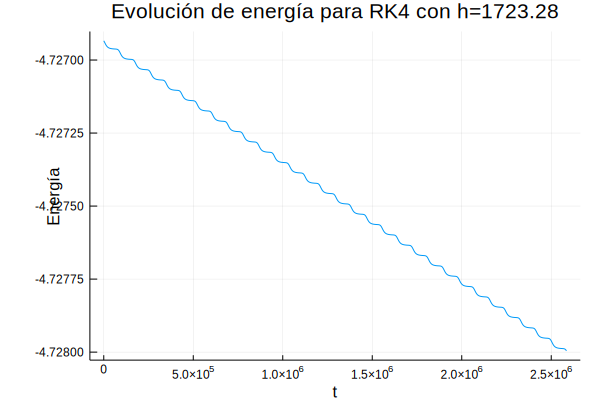

In [35]:
plot(tt,EE,xlabel="t",ylabel="Energía",label="", 
           title="Evolución de energía para RK4 con h=$h")

Observese que la energía no se mantiene constante, sino que varía a lo largo del tiempo. Si para cada $k=1,2,\ldots,n$, la aproximación $u_k$ fuese igual a la solución exacta
$$u(t_k)=(x(t_k), y(t_k), z(t_k), v_x(t_k), v_y(t_k),v_z(t_k)),$$ 
entonces $E(u_k,\mu)$ sería exactamente igual a $E(u_0,\mu)$. Dichas variaciones del valor de la energía permiten medir de una forma sencilla el nivel de precisión de la aplicación del método RK4. Para ello, calcularemos los _errores relativos en energía_: para cada $k$, el error relativo en energía en $t=t_k$ es 
$$\big|E(u_k,\mu)/E(u_0,\mu)-1 \big|.$$ 
En lo que sigue, omitiremos el calificativo relativo y nos referiremos a él simplemente como _error en energía_.

### 1.2-Ejercicio (Comprobación): primeros errores en energía de RK4 (h=T/50)
Obtener una tabla de 
$$\Big(t_k,\,  \big|E(u_k,\mu)/E(u_0,\mu)-1\big|\Big)$$
para $k=1,2,3$. 

In [36]:
hcat(tt[2:4], abs.(EE[2:4]/EE[1].-1))

3×2 Array{Float64,2}:
 1723.28  3.82989e-7
 3446.56  8.02524e-7
 5169.84  1.24526e-6


**Resultados esperados:**

    1723.28  3.82989e-7
    3446.56  8.02524e-7
    5169.84  1.24526e-6

### 1.3-Ejercicio: Gráfica de errores en energía de RK4 (h=T/50)
Obtener una gráfica de los errores en energía

$$\big|E(u_k,\mu)/E(u_0,\mu)-1\big|$$

con respecto de los tiempos $t_k = k \, T/50$ para $k=0,1,\ldots,n$.

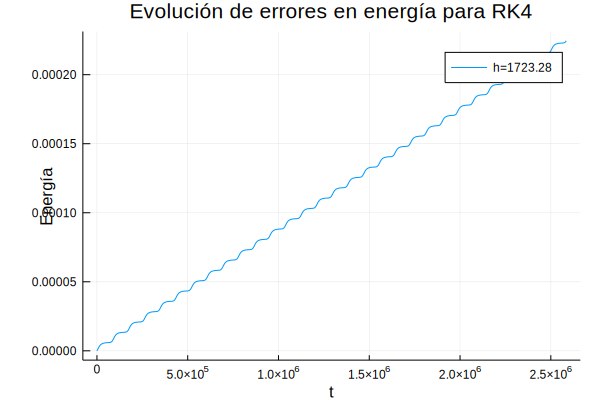

In [37]:
err = abs.(EE/EE[1].-1)
plot(tt,err,xlabel="t",ylabel="Energía",label="h=$h", 
           title="Evolución de errores en energía para RK4")

<a href="#top">Back to the top</a>

## 2-Implementación del método RKG4
** Método de Runge-Kutta implícito de colocación de Gauss de orden 4**

Queremos simular numéricamente la evolución de sistemas modelados por 
ecuaciones diferenciales ordinarias (EDOs) de dimensión $d\geq 1$ de la forma

<a id='Edo-Comp'></a>
\begin{equation*}
\frac{d}{dt} u = f(t,u,p). \hspace{10em} \tag{1}
\end{equation*}

donde $u =(u^1,\ldots,u^d) \in \mathbb{R}^d$ es el _vector de estado_ del sistema, y $p \in \mathbb{R}^m$ es un vector de parámetros constantes del sistema.

Sabemos que, fijado el vector $p$ de parámetros constantes, 
dados $t_0 \in \mathbb{R}$ y $u_0 =(u^1_0,\ldots,u^d_0) \in \mathbb{R}^d$, existe una única solución $u(t)$ de [(1)](#Edo-Comp) que satisfaga la condición inicial

<a id='Cond-Ini'></a>
\begin{equation}
  u(t_0)=u_0. \hspace{12em} \tag{2}
\end{equation}

En la práctica, nos interesará calcular de forma aproximada la solución $u(t)$ para un cierto intervalo temporal $t \in [t_0,T]$. Se aproximará dicha solución en una discretización del tiempo obtenida de dividir el intervalo temporal $[t_0,T]$ en $n$ partes iguales. Es decir,  se considerarán los valores discretos del tiempo $t_0,t_1,t_2,\ldots,t_{n-1},t_n=T$, donde $t_k=t_{0}+k\, (T-t_0)/n$, y se calcularán las aproximaciones 
$u_k =(u^1_k,\ldots,u^d_k) \approx u(t_k)$ para $k=0,1,\ldots,n$. Para calcular $u_k$ a partir de $u_{k-1}$, se aplicarán $m$ pasos de longitud $h=(T-t_0)/(n m)$ del método de Runge-Kutta implícito de colocación de Gauss de orden 4.


### 2.1-Ejercicio
En este apartado, se debe primeramente implementar Julia el método RKG4. Se definirá una función (que llamaremos RKG4) que toma como argumentos de entrada $u0, t0, T, n, f, p, m$. El significado de los argumentos de entrada de dicha función son los mismos que para RK4, implementado en la semana 4. El argumento de salida es, como en RK4, una matriz $W \in \mathbb{R}^{(n+1) \times (d+1)}$

 \begin{eqnarray*}
W = \left(
     \begin{array}{cccc}
t_0    &   u^1_0 & \cdots& u^d_0  \\
t_1    &    u^1_1 & \cdots& u^d_1  \\
\vdots &  \vdots & \vdots& \vdots \\
t_{n}  &      u^1_n & \cdots& u^d_n
     \end{array}
\right),
\end{eqnarray*} 

donde $t_k = t_0 + k \,(T-t_0)/n$, y los vectores $u_k  = (u^1_k,\ldots,u^d_k) \in \mathbb{R}^d$ ($k=1\ldots,n$) son aproximaciones de $u(t_k)$ que se han obtenido aplicando $m$ pasos del método RKG4 (para el sistema (1) con la condición inicial (2)) con longitud de paso $h=(T-t_0)/(n m)$. 

Al tratarse de un método implícito, para calcular la aproximación de la solución a obtener en cada paso del método se requiere resolver un sistema de ecuaciones (que en el caso de RKG4, determina implícitamente los vectores $K_1$ y $K_2$.). Dicho sistema, se resolverá por medio de la llamada iteración del punto fijo, tal como se describe en las transparencias de la primera parte del tema 4. Se tomará como tolerancia al error de iteración, itol$=10^{-12}$. Por otro lado, para evitar que el método iterativo se ejecute de forma indefinida en caso de no llegue a satisfacer el criterio de parada basado en itol, fijaremos un número máximo de iteraciones por paso, en concreto, 100 iteraciones por paso.


In [38]:
  function  RKG4(u0, t0, T, n, f, p, m=1)
    itol = 1.e-12
    itermax = 100
    a11 = 0.25
    a12 = 0.25 - sqrt(3)/6
    a21 = 0.25 + sqrt(3)/6
    a22 = 0.25
    h = (T-t0)/(n*m)   # Calculo de la longitud de paso
    ha = h * [a11  a12; a21 a22]
    hc = [ha[1,1] + ha[1,2],  ha[2,1] + ha[2,2]]
    # Se deduce la dimension del sistema de EDOs a partir del numero 
    # de componentes del vector de estado inicial
      d = length(u0)  
    # Inicializacion a cero de la matriz de salida de resultados
      W = zeros(n+1,d+1)
      W[1,:] = [t0; u0]  # Se rellena la primera fila de la matriz de resultados 
      tj = t0
      uj = u0
    # Calculo sucesivo de los tiempos tj y las aproximaciones uj de u(tj)
    for j in 1:n
        for i in 1:m
        uj = RKG4step(tj,uj,p,f,h/2,ha,hc,itol,itermax)
        tj = tj + h
        end
        W[j+1,:] = [tj; uj] # Se introduce el resultado del paso j-ésimo 
                            # en la fila (j+1)-ésima de la matriz de resultados
    end
    return W
  end


function RKG4step(tj,uj,p,f,h2,ha,hc,itol,itermax)
        err = Inf
        K1 = f(tj,uj,p)
        K2 = K1
    for j=1:itermax 
        K1z = K1
        K2z = K2
        K1 = f(tj + hc[1], uj + ha[1,1]*K1z + ha[1,2]*K2z, p)
        K2 = f(tj + hc[2], uj + ha[2,1]*K1z + ha[2,2]*K2z, p)
        err = max(norm(K1-K1z),norm(K2-K2z))
        if (err < itol) 
            return  uj + h2*(K1+K2)
        end
     end
        return  uj + h2*(K1+K2)
end

RKG4step (generic function with 1 method)

<a href="#top">Back to the top</a>

## 3-Errores en energía del método RKG4 

### 3.1-Ejercicio (Comprobación): primeros errores en energía de RKG4 (h=T/50)

Aplicar ahora RKG4 para obtener aproximaciones $u_k$ de $u(t_k)$ para los mismos tiempos que en el apartado 1.(a) (es decir $t_k=k\, T/50$, para $k=1,2,3,\ldots,n$, con $n=1500$. Obtener una tabla de 

$$\Big(t_k,\,  \big|E(u_k,\mu)/E(u_0,\mu)-1\big|\Big)$$

para $k=1,2,3$. 

In [49]:
res = RKG4(u0,0.,Tfinal,n,fsat,p)
tt= res[:,1]
uu = res[:,2:end]
EE = zeros(n+1)
for i=0:n
    EE[i+1] = Efun(uu[i+1,:],p)
end

In [50]:
hcat(tt[2:4], abs.(EE[2:4]/EE[1].-1))

3×2 Array{Float64,2}:
 1723.28  8.76683e-9
 3446.56  3.4755e-8 
 5169.84  7.69989e-8

>**Resultados esperados:**
>
>     1723.28  8.76683e-9
>     3446.56  3.4755e-8 
>     5169.84  7.69989e-8

### 3.2-Ejercicio: Errores en energía de RKG4 para distintos valores de h

En este apartado comprobaremos que los errores relativos en energía disminuyen considerablemente al disminuir la longitud de paso $h$ utilizada.

Para ello, se requiere representar en una misma figura las gráficas de los errores en energía en $t_k=k\, T/50$, ($k=1,\ldots,n$) para los resultados obtenidos por RKG4 con tres longitudes de paso distintas: $h=T/50$, $h=T/100$, y $h=T/200$.

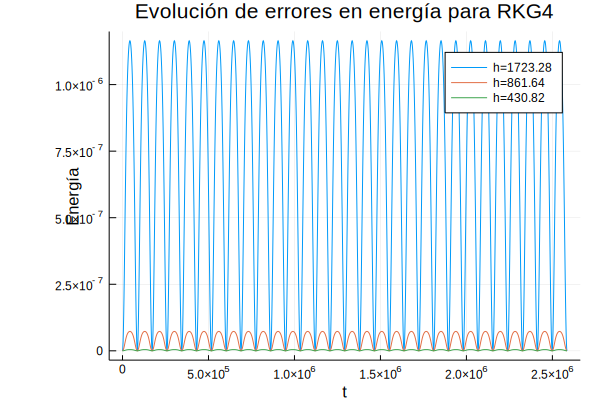

In [59]:
h = T/50
err = abs.(EE/EE[1].-1)
plot(tt,err,xlabel="t",ylabel="Energía",label="h=$h", 
           title="Evolución de errores en energía para RKG4")

m = 2
res = RKG4(u0,0.,Tfinal,n,fsat,p,m)
tt= res[:,1]
uu = res[:,2:end]
EE2 = zeros(n+1)
for i=0:n
    EE2[i+1] = Efun(uu[i+1,:],p)
end


h2 = h/m
err2 = abs.(EE2/EE2[1].-1)
plot!(tt,err2,xlabel="t",ylabel="Energía",label="h=$h2")

m=4
res = RKG4(u0,0.,Tfinal,n,fsat,p,m)
tt= res[:,1]
uu = res[:,2:end]
EE4 = zeros(n+1)
for i=0:n
    EE4[i+1] = Efun(uu[i+1,:],p)
end

err4 = abs.(EE4/EE4[1].-1)

h4 = h/m
plot!(tt,err4,xlabel="t",ylabel="Energía",label="h=$(h/m)")

### 3.3-Ejercicio: Estudio de los errores relativos en energía de RKG4: ¿Como disminuyen los erroes en energía al disminuir $h$?

En este apartado comprobaremos cómo disminuyen los errores relativos en energía al disminuir la longitud de paso $h$ utilizada por RKG4.

- **Para ello, se  representarán en una misma figura las gráficas de los errores en energía en $t_k=k\, T/50$, ($k=1,\ldots,n$) escalados de la siguiente forma para los resultados obtenidos con tres longitudes de paso distintas: $h=T/50$ (errores sin escalar), $h=T/100$ (errores multiplicados por 16), y $h=T/200$ (errores multiplicados por 256).**

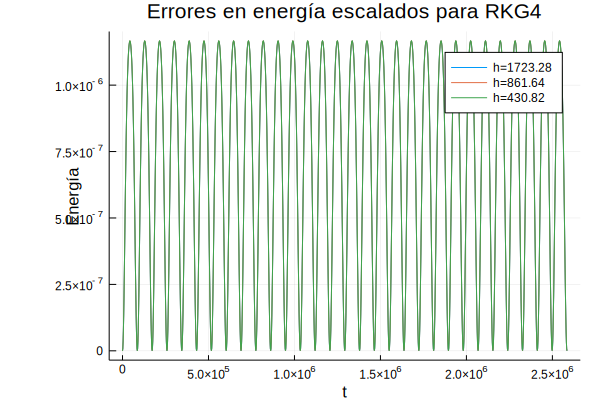

In [61]:
plot(tt,err,xlabel="t",ylabel="Energía",label="h=$h", 
           title="Errores en energía escalados para RKG4")

plot!(tt,16*err2,xlabel="t",ylabel="Energía",label="h=$h2")


plot!(tt,256*err4,xlabel="t",ylabel="Energía",label="h=$h4")

- **¿Qué podemos deducir sobre la forma en que disminuye el error en energía al disminuir la longitud de paso $h$?**

> **Respuesta**
>
>  El error disminuye de forma proporcional a $h^4$.

<a href="#top">Back to the top</a>

## 4-Comparación de errores en energía de RK4 y RKG4 para tiempos largos

### 4.1-Ejercicio: Aplicación de RKG4 para t en [0, 100000 T] con longitud de paso h=T/50

Aplicar el método RKG4 utilizando $h=T/50$ como longitud de paso, para calcular las posiciones y velocidades del satélite en los tiempos $1000\, k\, T$, para $k=0,1,\ldots,100$. 

Por un lado medir el tiempo de cálculo requerido para ello. Por otro lado, como comprobación, mostrar el valor de la coordenada $x$ del satélite obtenida para $t=100000\, T$.

In [12]:
n = 100
m = 50000
@time resRKG4 = RKG4(u0,0.,1000*n*T,n,fsat,p,m);

118.350991 seconds (1.26 G allocations: 74.506 GiB, 9.86% gc time)


In [13]:
resRKG4[end,2]

24991.219219428425

>**Valor esperado para x en el final del intervalo:** $24991.219\ldots$

### 4.2-Ejercicio: Aplicación de RK4 para t en [0, 100000 T] con longitud de paso h=T/400

Aplicar el método RK4 utilizando $h=T/400$ como longitud de paso, para calcular las posiciones y velocidades del satélite en los mismos tiempos que en el apartado anterio, es decir, $1000\, k\, T$, para $k=0,1,\ldots,100$.

Medir el tiempo de cálculo requerido para ello.

In [14]:
n = 100
m = 400000
@time resRK4 = RK4(u0,0.,1000*n*T,n,fsat,p,m);

179.060566 seconds (1.84 G allocations: 93.579 GiB, 8.51% gc time)


Hemos aplicado RKG4 con longitud e paso $h=T/50$, y RK4 con $h=T/400$, para tratar de que ambas ejecuciones requieran un tiempo de cálculo similar. 

### 4.3-Ejercicio: Comparación de errores en energía de RKG4 para h=T/50 y RK4 para h=T/400


Para comparar los errores en energía de ambos métodos,  representar en una misma figura la evolución de los errores en energía de ambas ejecuciones.

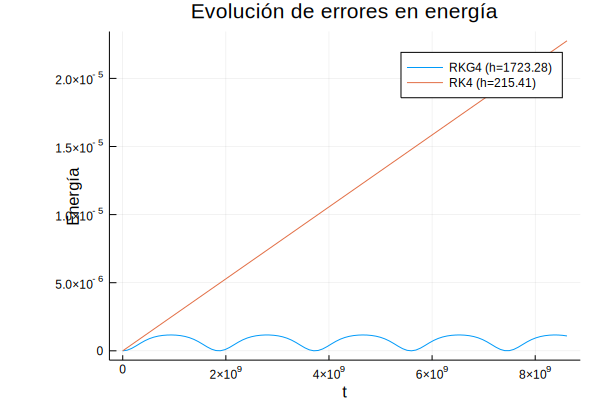

In [15]:
tt= resRKG4[:,1]
uu = resRKG4[:,2:end]
EE = zeros(n+1)
for i=0:n
    EE[i+1] = Efun(uu[i+1,:],p)
end
h= T/50
errRKG4 = abs.(EE/EE[1].-1)

plot(tt,errRKG4,xlabel="t",ylabel="Energía",label="RKG4 (h=$h)", 
           title="Evolución de errores en energía")



tt= resRK4[:,1]
uu = resRK4[:,2:end]
EE = zeros(n+1)
for i=0:n
    EE[i+1] = Efun(uu[i+1,:],p)
end
h= T/400
errRK4 = abs.(EE/EE[1].-1)

plot!(tt,errRK4,xlabel="t",ylabel="Energía",label="RK4 (h=$h)")

**¿Cual de los dos métodos a resultado ser más eficiente desde el punto de vista del error en energía?**

>**Respuesta**
>
> Claramente, RKG4 ha resultado más eficiente, pues necesitando un tiempo de CPU parecido que RK4,  el error en energía resulta ser menor.

### 3.4-Ejercicio: Precesión de la órbita del satélite

- ** Representar en una misma figura la proyección sobre el plano OXY de la trayectoria del satélite en los intervalos $[(366\,j\,T,(366\,j +1)\, T]$ para $j=0,1,2,\ldots,10$, para ver como cambia la órbita del satélite a lo largo de (aproximadamente) diez años. (Hay que utilizar el atributo aspect_ratio=1 de plot para que muestre la misma escala para tanto para $x$ como para $y$).
Utilizar para ello RKG4 con h=T/200. ** El cambio en la orientación de la órbita eliptica a lo largo del tiempo se conoce como _precesión de la órbita_.

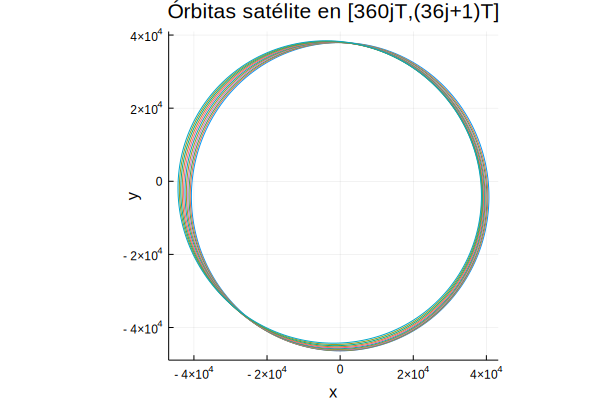

In [16]:
M = 366
m=200*M
N = 10
res = RKG4(u0,0.,M*N*T,N,fsat,p,m)
tlist = res[:,1]
ulist = res[:,2:end]

n = 200
res = RKG4(u0,0.,T,n,fsat,p)
xx = res[:,2]
yy = res[:,3]

plt = plot(xx,yy,aspect_ratio=1, xlabel="x", ylabel="y",
                 title="Órbitas satélite en [360jT,(36j+1)T]",label="")

for j=1:N
    t1 = tlist[j+1]
    u1 = ulist[j+1,:]
    res = RKG4(u1,t1,t1+T,n,fsat,p)
    xx = res[:,2]
    yy = res[:,3]
    plot!(xx,yy,label="")
end

display(plt)

<a href="#top">Back to the top</a>

### Valoración

_Incluir aquí los comentarios de valoración de la tarea a entregar (dificultad, interés, etc, incluidas, si se quiere, sugerencias de mejora del ejercicio), así como una estimación del tiempo dedicado al trabajo de la semana (desglosado en el tiempo de estudio de material teórico, tiempo de dedicación a la participación activa o pasiva en los foros, tiempo de implementación y experimentación con los problemas prácticos planteados, y tiempo de preparación del documento jupyter final)._